### Importação dos dados



In [23]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [24]:
# Função que calcula o faturamento de uma loja
def faturamento(lojax):
  faturamentox = round(sum(lojax['Preço']), 2)
  return faturamentox

# Aplicando a função anterior em cada uma das 4 lojas e exibindo o resultado
faturamento_1 = faturamento(loja)
print(f'Faturamento da loja 1: {faturamento_1:,} reais\n')

faturamento_2 = faturamento(loja2)
print(f'Faturamento da loja 2: {faturamento_2:,} reais\n')

faturamento_3 = faturamento(loja3)
print(f'Faturamento da loja 3: {faturamento_3:,} reais\n')

faturamento_4 = faturamento(loja4)
print(f'Faturamento da loja 4: {faturamento_4:,} reais')

Faturamento da loja 1: 1,534,509.12 reais

Faturamento da loja 2: 1,488,459.06 reais

Faturamento da loja 3: 1,464,025.03 reais

Faturamento da loja 4: 1,384,497.58 reais


# 2. Vendas por Categoria


In [25]:
# Criando uma lista com todas as categorias de produtos
categorias = []
for item in loja['Categoria do Produto']:
  if item not in categorias:
    categorias.append(item)

# Função que retorna a quantidade de vendas de uma dada categoria
def vendas_por_categoria(categoria, loja):
  cont = 0
  for item in loja['Categoria do Produto']:
    if item == categoria:
      cont += 1
  return cont

# Função que cria um diiconário em que as chaves recebem uma lista com os nomes das categorias e os valores recebem a quantia vendida
def agrupamento(loja):
  agrupamentox = {}
  for item in categorias:
    agrupamentox[item] = vendas_por_categoria(item, loja)
  return dict(sorted(agrupamentox.items(), key= lambda x : x[1], reverse=True))

# Aplicando a função anterior em cada uma das lojas e exibindo os resultados
vendas_por_categoria_loja1 = agrupamento(loja)
valores1 = [valor for valor in vendas_por_categoria_loja1.values()]
chaves1 = [chave for chave in vendas_por_categoria_loja1.keys()]
print(f'Vendas por categoria da loja 1:\n\n{vendas_por_categoria_loja1}\n')

vendas_por_categoria_loja2 = agrupamento(loja2)
valores2 = [valor for valor in vendas_por_categoria_loja2.values()]
chaves2 = [chave for chave in vendas_por_categoria_loja2.keys()]
print(f'Vendas por categoria da loja 2:\n\n{vendas_por_categoria_loja2}\n')

vendas_por_categoria_loja3 = agrupamento(loja3)
valores3 = [valor for valor in vendas_por_categoria_loja3.values()]
chaves3 = [chave for chave in vendas_por_categoria_loja3.keys()]
print(f'Vendas por categoria da loja 3:\n\n{vendas_por_categoria_loja3}\n')

vendas_por_categoria_loja4 = agrupamento(loja4)
valores4 = [valor for valor in vendas_por_categoria_loja4.values()]
chaves4 = [chave for chave in vendas_por_categoria_loja4.keys()]
print(f'Vendas por categoria da loja 4:\n\n{vendas_por_categoria_loja4}\n')


Vendas por categoria da loja 1:

{'moveis': 465, 'eletronicos': 448, 'brinquedos': 324, 'eletrodomesticos': 312, 'esporte e lazer': 284, 'instrumentos musicais': 182, 'livros': 173, 'utilidades domesticas': 171}

Vendas por categoria da loja 2:

{'moveis': 442, 'eletronicos': 422, 'brinquedos': 313, 'eletrodomesticos': 305, 'esporte e lazer': 275, 'instrumentos musicais': 224, 'livros': 197, 'utilidades domesticas': 181}

Vendas por categoria da loja 3:

{'moveis': 499, 'eletronicos': 451, 'brinquedos': 315, 'eletrodomesticos': 278, 'esporte e lazer': 277, 'livros': 185, 'utilidades domesticas': 177, 'instrumentos musicais': 177}

Vendas por categoria da loja 4:

{'moveis': 480, 'eletronicos': 451, 'brinquedos': 338, 'esporte e lazer': 277, 'eletrodomesticos': 254, 'utilidades domesticas': 201, 'livros': 187, 'instrumentos musicais': 170}



# 3. Média de Avaliação das Lojas

In [26]:
# Função que calcula a média de avaliação de uma loja
def media_de_avaliacao(loja):
  media = round(sum(loja['Avaliação da compra']) / len(loja['Avaliação da compra']), 2)
  return media

# Aplicando a função anterior a cada uma das lojas
media1 = media_de_avaliacao(loja)
print(f'Média de avaliação da loja 1: {media1}\n')

media2 = media_de_avaliacao(loja2)
print(f'Média de avaliação da loja 2: {media2}\n')

media3 = media_de_avaliacao(loja3)
print(f'Média de avaliação da loja 3: {media3}\n')

media4 = media_de_avaliacao(loja4)
print(f'Média de avaliação da loja 4: {media4}\n')

Média de avaliação da loja 1: 3.98

Média de avaliação da loja 2: 4.04

Média de avaliação da loja 3: 4.05

Média de avaliação da loja 4: 4.0



# 4. Produtos Mais e Menos Vendidos

In [27]:
produtos_unicos = []

for item in loja['Produto']:
  if item not in produtos_unicos:
    produtos_unicos.append(item)

# Função que retorna a quantia vendida de cada produto de uma loja
def mais_menos_vendidos(loja):
  vendas_produtos = {}
  cont = 0
  for produto in produtos_unicos:
    cont = 0
    for item in loja['Produto']:
      if item == produto:
        cont += 1
    vendas_produtos[produto] = cont
  return sorted(vendas_produtos.items(), key=lambda x : x[1], reverse=True)

# Aplicando a função anterior a cada uma das lojas
vendas_produtos_loja1 = mais_menos_vendidos(loja)
vendas_produtos_loja2 = mais_menos_vendidos(loja2)
vendas_produtos_loja3 = mais_menos_vendidos(loja3)
vendas_produtos_loja4 = mais_menos_vendidos(loja4)

# Função que verifica os 5 produtos mais e menos vendidos de uma loja e os exibe
def exibir(produtos, loja):
  print(f'Os 5 produtos mais vendidos da loja {loja} foram:\n ')
  for i in range(5):
    print(f'{produtos[i][0]} - {produtos[i][1]} unidades')

  print(f'\nOs 5 produtos menos vendidos da loja {loja} foram:\n ')
  for i in range(-1, -6, -1):
    print(f'{produtos[i][0]} - {produtos[i][1]} unidades')
  print('\n','-=' * 50,'\n')

# Aplicando a função anterior a cada uma das lojas
exibir(vendas_produtos_loja1, 1)
exibir(vendas_produtos_loja2, 2)
exibir(vendas_produtos_loja3, 3)
exibir(vendas_produtos_loja4, 4)

Os 5 produtos mais vendidos da loja 1 foram:
 
Micro-ondas - 60 unidades
TV Led UHD 4K - 60 unidades
Guarda roupas - 60 unidades
Secadora de roupas - 58 unidades
Blocos de montar - 56 unidades

Os 5 produtos menos vendidos da loja 1 foram:
 
Celular ABXY - 33 unidades
Headset - 33 unidades
Panela de pressão - 35 unidades
Pandeiro - 36 unidades
Mochila - 39 unidades

 -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-= 

Os 5 produtos mais vendidos da loja 2 foram:
 
Iniciando em programação - 65 unidades
Micro-ondas - 62 unidades
Bateria - 61 unidades
Violão - 58 unidades
Pandeiro - 58 unidades

Os 5 produtos menos vendidos da loja 2 foram:
 
Jogo de tabuleiro - 32 unidades
Impressora - 34 unidades
Mesa de jantar - 34 unidades
Poltrona - 35 unidades
Fone de ouvido - 37 unidades

 -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-= 

Os 5 produtos mais vendidos da loja 3 foram:
 
Kit banque

# 5. Frete Médio por Loja


In [28]:
# Função que calcula o frete médio de uma loja
def frete_medio(loja):
  cont = soma = 0
  for frete in loja['Frete']:
    soma += frete
    cont += 1
  frete = round(soma / cont, 2)
  return frete

# Aplicando a função anterior a cada uma das lojas
frete1 = frete_medio(loja)
frete2 = frete_medio(loja2)
frete3 = frete_medio(loja3)
frete4 = frete_medio(loja4)

print(f' O frete médio da loja 1 é de {frete1} reais\n')
print(f' O frete médio da loja 2 é de {frete2} reais\n')
print(f' O frete médio da loja 3 é de {frete3} reais\n')
print(f' O frete médio da loja 4 é de {frete4} reais\n')

 O frete médio da loja 1 é de 34.69 reais

 O frete médio da loja 2 é de 33.62 reais

 O frete médio da loja 3 é de 33.07 reais

 O frete médio da loja 4 é de 31.28 reais



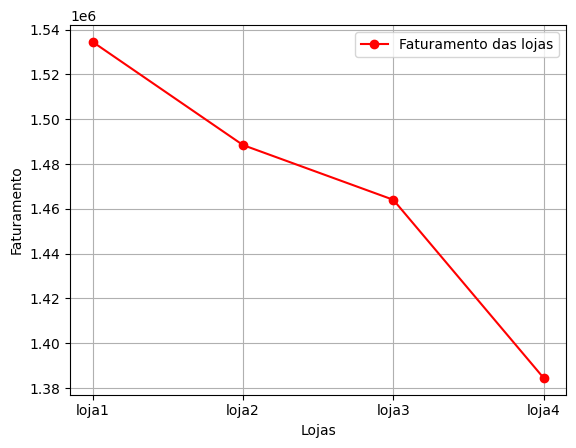

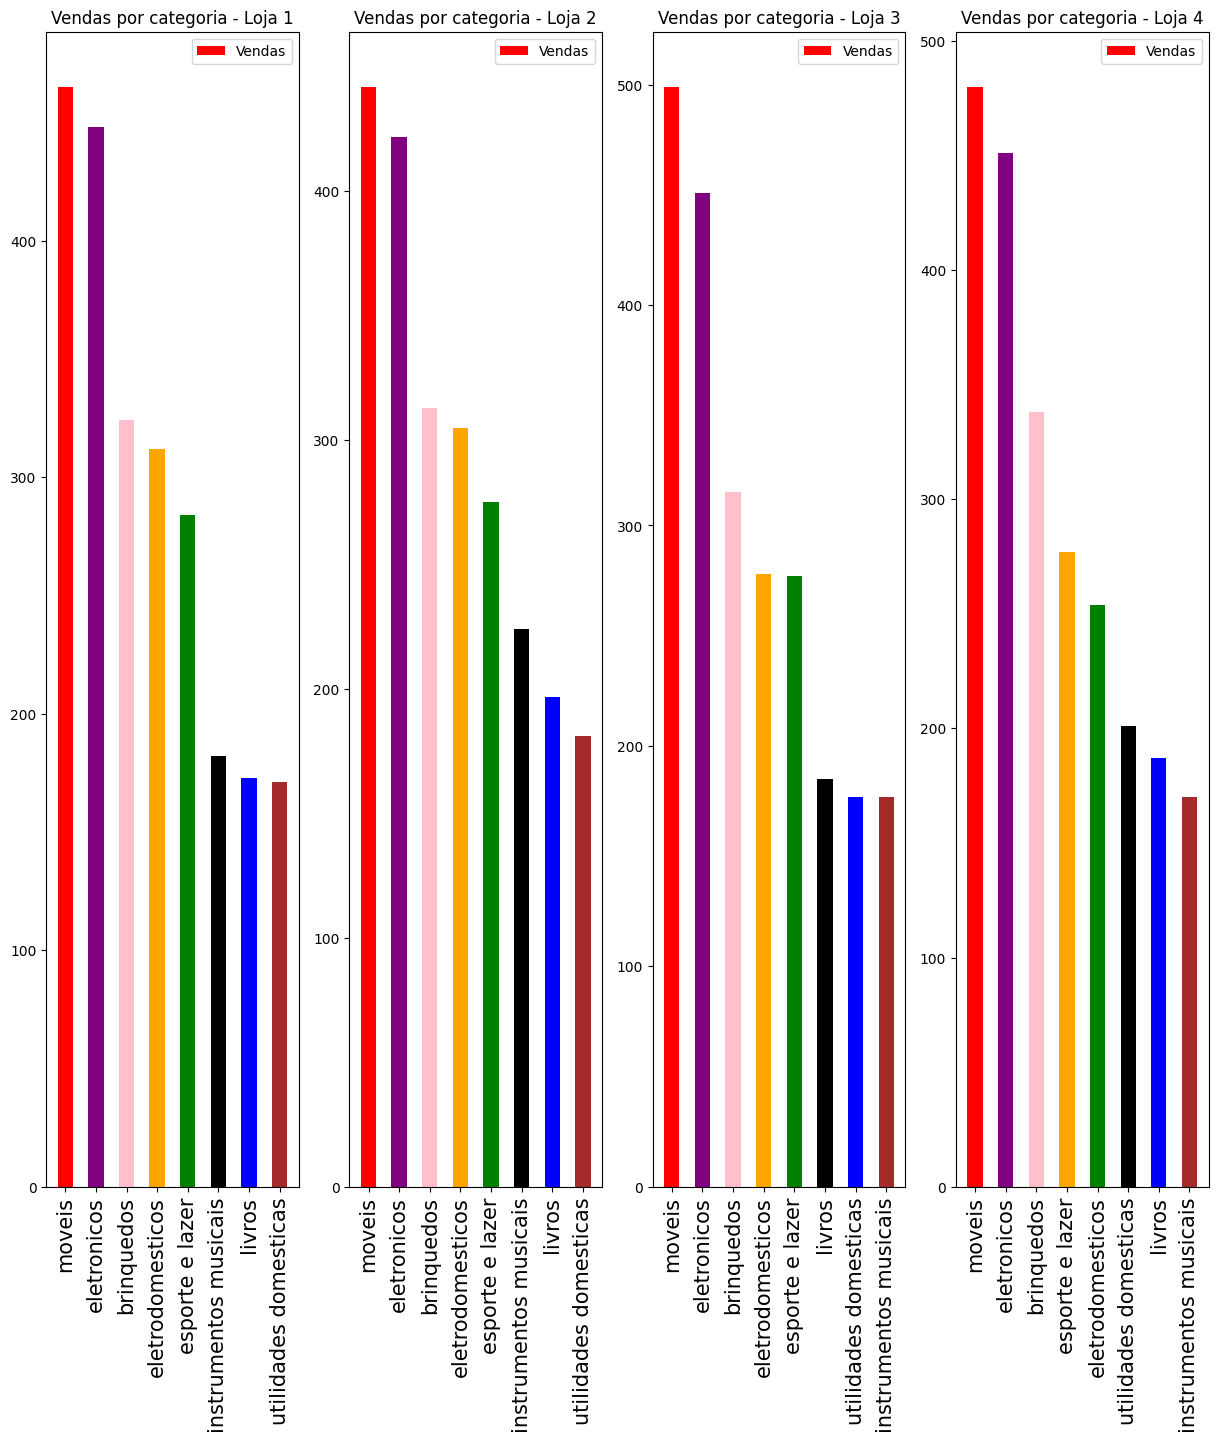

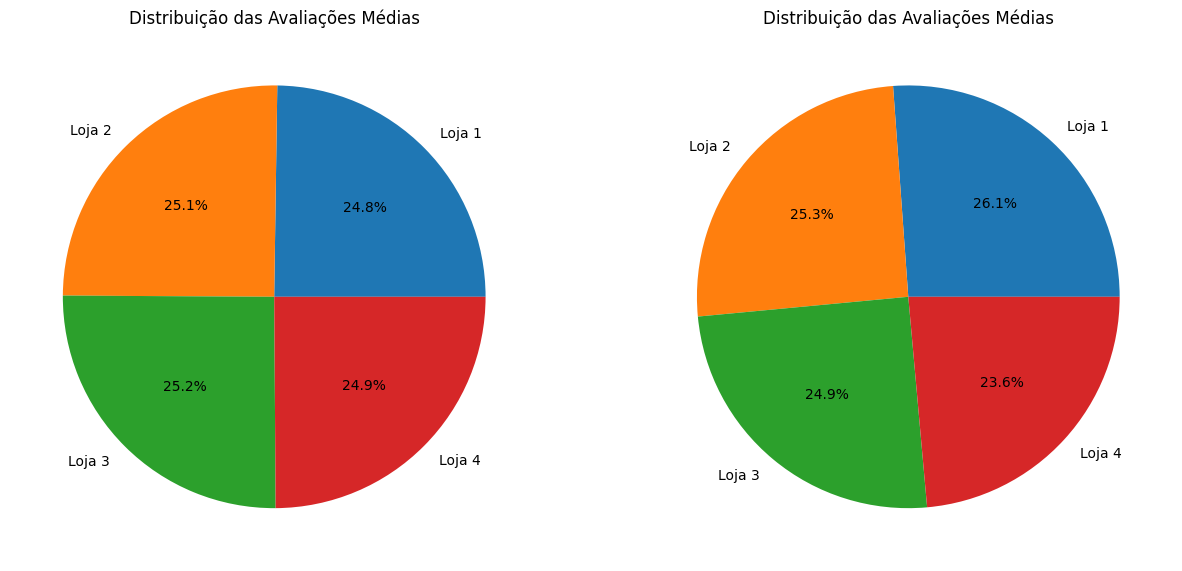

In [29]:
import matplotlib.pyplot as plt

# Criando um gráfico de linha no qual o eixo x representa cada uma das lojas e o eixo y o seu respectivo faturamento
x = ['loja1', 'loja2', 'loja3', 'loja4']
y = [faturamento_1,faturamento_2,faturamento_3,faturamento_4]
plt.plot(x,y,label='Faturamento das lojas',color='red',marker='o')
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.legend()
plt.grid(True)
plt.show()
print('\n')

# Criando quatro gráficos de barras que exibem juntos a quantidade de itens vendidos de cada categoria por loja
cores = ['red', 'purple', 'pink', 'orange','green','black','blue','brown']
barras = plt.figure(figsize=(15,15))
barras.add_subplot(141)
plt.title('Vendas por categoria - Loja 1')
plt.bar(x=chaves1,height=valores1,width=0.5,color=cores,label='Vendas')
plt.xticks(rotation=90, fontsize=15)
plt.legend()

barras.add_subplot(142)
plt.title('Vendas por categoria - Loja 2')
plt.bar(x=chaves2,height=valores2,width=0.5,color=cores,label='Vendas')
plt.xticks(rotation=90, fontsize=15)
plt.legend()

barras.add_subplot(143)
plt.title('Vendas por categoria - Loja 3')
plt.bar(x=chaves3,height=valores3,width=0.5,color=cores,label='Vendas')
plt.xticks(rotation=90, fontsize=15)
plt.legend()

barras.add_subplot(144)
plt.title('Vendas por categoria - Loja 4')
plt.bar(x=chaves4,height=valores4,width=0.5,color=cores,label='Vendas')
plt.xticks(rotation=90, fontsize=15)
plt.legend()

plt.show(barras)
print('\n')

# Criando dois gráficos de pizza, um que exibe a avaliação média de cada loja e outro que motra o frete médio de cada loja
pies = plt.figure(figsize=(15,15))
pies.add_subplot(121)
medias_avaliacao = [media1, media2, media3, media4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
plt.title('Distribuição das Avaliações Médias')
plt.pie(medias_avaliacao,labels=lojas,autopct='%1.1f%%')

pies.add_subplot(122)
media_frete = [frete1, frete2, frete3, frete4]
plt.title('Distribuição das Avaliações Médias')
plt.pie(media_frete,labels=lojas,autopct='%1.1f%%')

plt.show(pies)

# Relatório

Objetivo: Analisar as quatro lojas do senhor João e escolher qual delas será vendida, com base em três critérios principais:

Faturamento (quanto maior, melhor)

Avaliação média dos clientes (quanto maior, melhor)

Custo médio de frete (quanto menor, melhor)

Os critérios 'Vendas por categoria' e 'Produtos mais e menos vendidos' não foram considerados para esta análise final, pois estão bem equilibrados entre todas as lojas, e o critério 'Faturamento' já engloba estes outros dois, pois independente das vendas por categoria e produtos mais e menos vendidos por cada loja, no final o que realmente faz a diferença neste aspecto é o faturamento de cada loja.

📌 Pesos definidos para a análise:

Faturamento: 50%

Avaliação: 30%

Custo de frete: 20%

📊 Resultado da análise (score final):

Loja 1: 0.9747

Loja 2: 0.9706

Loja 3: 0.9665

Loja 4: 0.9476

Cálculo dos Scores Finais Ponderados

Com base nos critérios de faturamento, avaliação média e custo de frete, calculamos os scores finais ponderados de cada loja, aplicando os seguintes pesos:

Faturamento: 50%

Avaliação: 30%

Custo de frete: 20%

Os scores finais de cada loja foram calculados da seguinte forma:

Loja 1 - Faturamento(50%) = 1.00 /
Avaliação(30%) = 0.981 /
Frete(20%) = 0.902 /
Score Final =	0.9747

Loja 2 - Faturamento(50%) = 0.970 /
Avaliação(30%) = 0.998 /
Frete(20%) = 0.931 /
Score Final =	0.9706

Loja 3 - Faturamento(50%) = 0.955 /
Avaliação(30%) = 1.00 /
Frete(20%) = 0.945 /
Score Final =	0.9665

Loja 4 - Faturamento(50%) = 0.903 /
Avaliação(30%) = 0.987 /
Frete(20%) = 1.00 /
Score Final =	0.9476

🔍 Interpretação:

A Loja 1 obteve o maior score, graças ao seu alto faturamento, mesmo com avaliação inferior e maior custo de frete.

A Loja 4 teve o menor score geral. Apesar de ter o menor custo de frete, ela apresenta o menor faturamento e avaliação apenas mediana.

As lojas 2 e 3 ficaram com scores intermediários.

✅ Decisão:

Com base no score ponderado e na análise de desempenho geral, a recomendação é vender a Loja 4. Mesmo com custo de frete mais baixo e avaliação um pouco melhor, ela demonstra menor tração de vendas, o que é mais difícil de se recuperar. A loja 4 se destaca negativamente no critério mais relevante (faturamento) e não compensa isso com uma avaliação significativamente melhor ou vantagem operacional forte.